나이브 베이즈(naive bayes)는 확률 기반 머신러닝 분류 알고리즘이다.  
나이브 베이즈 분류 알고리즘은 데이터를 나이브(단순)하고 독립적인 사건으로 가정하고 이 독립 사건들을 베이즈 이론  (https://angeloyeo.github.io/2020/01/09/Bayes_rule.html)%EC%97%90 대입시켜 가장 높은 확률의 레이블로 분류를 실행하는 알고리즘이다.

가우시안 나이브 베이즈(Gussian Naive Bayes)  
분류 특징들의 값이 정규(가우시안) 분포되어 있다는 가정하에 조건부 확률을 계산하며 연속적인 성질이 있는 특성 데이터를 분류하는데 적합하다.  

P(A): 어떤 사건 A가 일어날 확률  
P(B): 어떤 사건 B가 일어날 확률  
P(A|B): 어떤 사건 B가 일어났을 때 사건 A가 일어날 확률  
P(B|A): 어떤 사건 A가 일어났을 때 사건 B가 일어날 확률 
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$  

<img src="./images/naive_bayes1.png" align="left" width="1300"/>  
<img src="./images/naive_bayes2.png" align="left" width="1300"/>  
<img src="./images/naive_bayes3.png" align="left" width="1300"/>

베르누이 나이브 베이즈(Berniulli Naive Bayes)  
분류 데이터의 특징이 0 또는 1로 표현되었을 때 데이터의 출현 여부에 따라서 0 또는 1로 구분되는 데이터에 사용된다.  
 
다항분포 나이브 베이즈(Multinimial Naive Bayes)  
분류 데이터의 특징이 출현 횟수로 표현되었을 때 데이터의 출현 횟수에 따라 값을 달리하는 데이터에 사용된다.

In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

가우시안 나이브 베이즈를 활용한 붓꽃(iris) 분류  
iris 데이터를 활용해 데이터의 특징에 따라 붓꽃의 종류를 구분한다.

In [2]:
# 사이킷런에서 제공하는 붓꽃(iris) 데이터를 불러오기 위해 import 한다.
from sklearn.datasets import load_iris
# Gaussian Naive Bayes 모델로 데이터를 분류하기 위해 import 한다.
from sklearn.naive_bayes import GaussianNB

데이터 획득  
사이킷런에서 제공하는 붓꽃(iris) 데이터 셋을 사용한다.

In [3]:
dataset = load_iris() # iris 데이터셋을 불러온다.
# print(type(dataset))
# print(dataset)
# print(dataset.data)
# print(dataset.feature_names)

# sepal length: 꽃 받침 길이, sepal width: 꽃 밫침 너비, petal length: 꽃잎 길이, petal width: 꽃잎 너비
# print(dataset.target_names) # setosa, versicolor, virginica: 품종
# print(dataset.target) # setosa => 0, versicolor => 1, virginica => 2: 레이블, 결과(답), 클래스, 타겟
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


데이터 시각화

In [4]:
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

꽃받침 길이

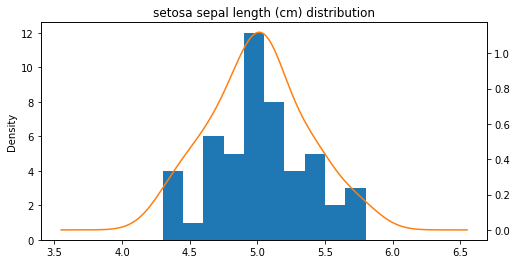

In [5]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', secondary_y=True, figsize=(8, 4), ax=ax,
    title='setosa sepal length (cm) distribution')
plt.show()

데이터 다듬기

In [6]:
# 전체 데이터의 20%를 테스트 데이터로 분리하고 나머지 80%를 학습에 사용한다.
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)
print('X_train: {}, X_test: {}'.format(len(X_train), len(X_test)))
print('y_train: {}, y_test: {}'.format(len(y_train), len(y_test)))
print('[꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비](문제): {}, 품종(답): {}'.format(X_train[0], y_train[0]))

X_train: 120, X_test: 30
y_train: 120, y_test: 30
[꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비](문제): [5.7 2.6 3.5 1. ], 품종(답): 1


가우시안 나이브 베이즈 모델 학습

In [7]:
model = GaussianNB() # 가우시안 나이브 베이즈 모델 객체를 만든다.
model.fit(X_train, y_train) # 가우시안 나이브 베이즈 모델을 학습시킨다.

GaussianNB()

모델 테스트

In [8]:
predict = model.predict(X_test) # 학습 데이터로 학습한 결과에 따른 테스트 데이터의 예측값을 계산한다.
print(classification_report(y_test, predict)) # classification_report(실제값, 예측값)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

